In [1]:
using Plots

In [10]:
"""
   euler

# Arguments

    - `λ::Float`: method parameter.

    - `Δt::Float`: time differential step size.

    - `method::String='explicit'`: method to use, either `explicit` or `implicit`.

# Returns

    `rv`: vector with the equation's solution.

"""
function euler(λ, Δt; method="explicit")
    n = Integer(round(2/Δt))
    time = LinRange(0, 2, n+1)
    rv = zeros(n+1)
    rv[1] = 1
    for i in 2:length(rv)
        if method == "explicit"
            rv[i] = rv[i-1] + Δt * (-λ * (rv[i-1] - cos(time[i-1])) - sin(time[i-1]))
        elseif method == "implicit"
            rv[i] = (rv[i-1] + Δt * (λ* (cos(time[i])) - sin(time[i]))) / (1 + Δt * λ)
        else
            print("Please select a valid method: either `explicit` or `implicit`.")
        end  
    end
    return rv
end

euler

El error explícito para Δt=0.1 es: 6.0163294205552875e41
El error implícito para Δt=0.1 es: 0.0
El error explícito para Δt=0.01 es: 3.826025393859988e254
El error implícito para Δt=0.01 es: 0.0
El error explícito para Δt=0.001 es: 1.452516463920426e76
El error implícito para Δt=0.001 es: 0.0
El error explícito para Δt=0.0001 es: 0.0
El error implícito para Δt=0.0001 es: 0.0
El error explícito para Δt=1.0e-5 es: 0.0
El error implícito para Δt=1.0e-5 es: 0.0
El error explícito para Δt=1.0e-6 es: 0.0
El error implícito para Δt=1.0e-6 es: 0.0


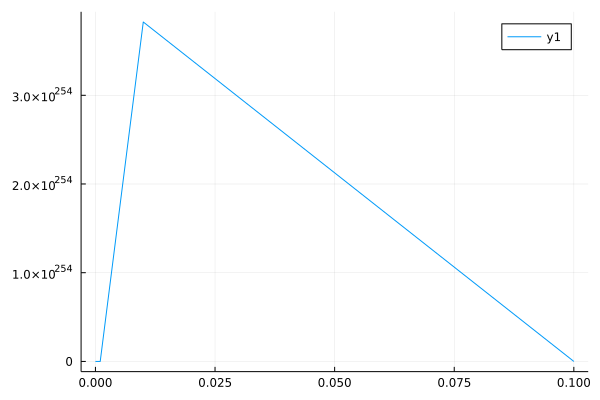

In [11]:
λ = 2100
size = 6
grid = zeros(size)
error_e = zeros(size)
error_i = zeros(size)
for i in 1:size
    Δt = 1 / 10^(i)
    n = Integer(round(2/Δt))
    error_e[i] = Float64(abs(cos(2) - last(euler(λ, Δt; method="explicit"))))
    print("El error explícito para Δt=$Δt es: $(round(error_e[i]))\n")
    error_i[i] = Float64(abs(cos(2) - last(euler(λ, Δt; method="implicit"))))
    print("El error implícito para Δt=$Δt es: $(round(error_i[i]))\n")
    grid[i] = Δt
end

plot(grid, error_e)

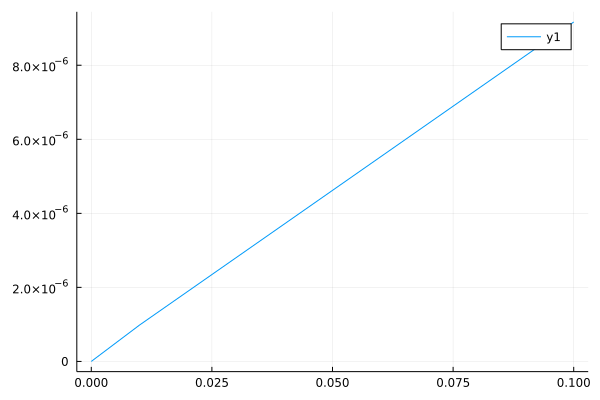

In [12]:
plot(grid, error_i)

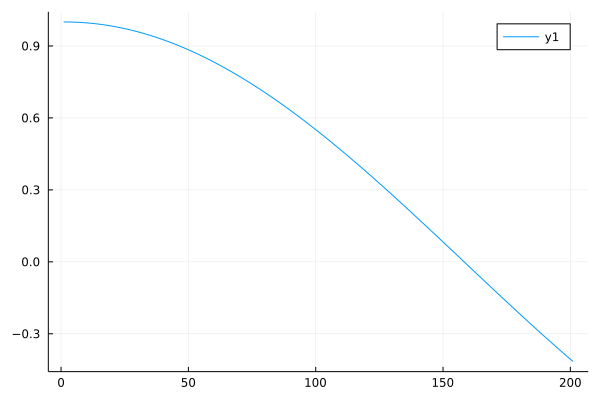

In [13]:
plot(euler(1, 0.01))